## Packages

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
 # Ensure project root (with src/) is on sys.path so imports like `from src...` work in notebooks
import sys
from pathlib import Path
p = Path.cwd()
for _ in range(6):
    if (p / 'pyproject.toml').exists():
        project_root = p
        break
    if p.parent == p:
        project_root = Path.cwd()
        break
    p = p.parent
else:
    project_root = Path.cwd()
# Insert at front so local src/ takes precedence
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))
print(f'Added project root to sys.path: {project_root}')

Added project root to sys.path: c:\Users\jarno\Downloads\stock-predictor-1


## Input Parameters

In [3]:
ticker = "^gspc"
start_date = "2019-01-01"
start_plot_date = "2025-01-01"
rsi_period = 14
periods = [20, 50, 200]
df = yf.download(ticker, start=start_date, interval="1d")
close_df = df[['Close']].copy()

C:\Users\jarno\AppData\Local\Temp\ipykernel_5720\2423735261.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, interval="1d")
[*********************100%***********************]  1 of 1 completed


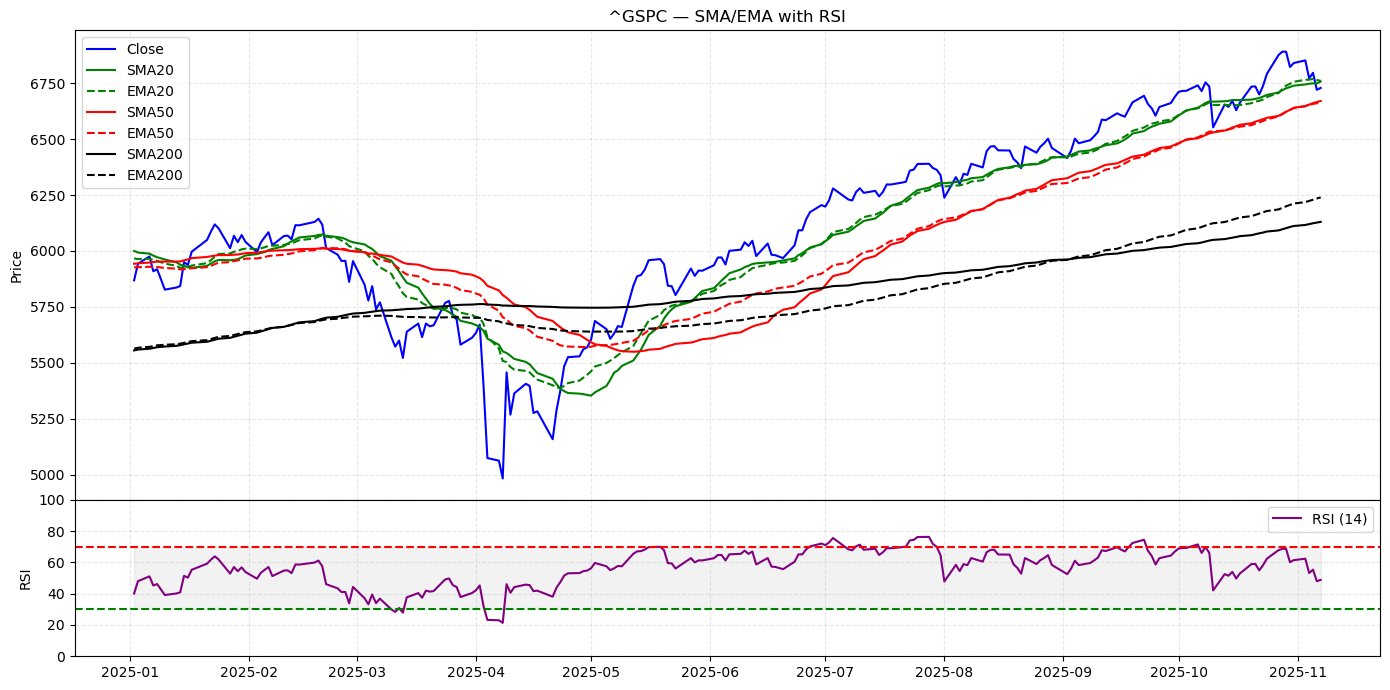

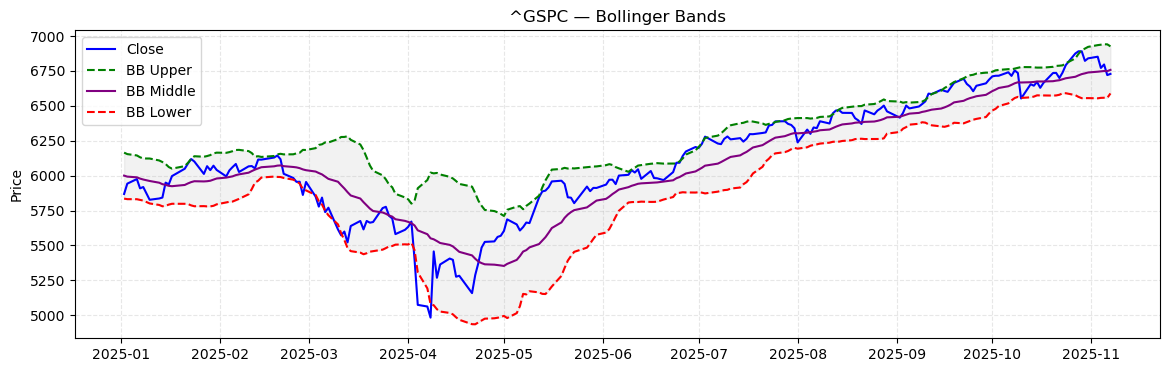

In [4]:
from src.plot_indicators import plot_sma_ema_with_rsi, plot_bollinger_bands, plot_rsi, plot_macd, plot_full_chart, plot_volume, plot_stochastic, plot_fibonacci_levels, plot_monthly_candles

plot_sma_ema_with_rsi(df, ticker, start_plot_date=start_plot_date)
plot_bollinger_bands(df, ticker, start_plot_date=start_plot_date)
# plot_rsi(df, ticker, start_plot_date=start_plot_date)
# plot_macd(df, ticker, start_plot_date=start_plot_date)

# plot_volume(df, ticker, start_plot_date=start_plot_date)
# plot_stochastic(df, ticker, start_plot_date=start_plot_date)
# plot_fibonacci_levels(df, ticker, start_plot_date=start_plot_date, auto_detect=True, lookback_period=150)


## SMA, EMA, BB printing

In [5]:
from src.technische_indicatoren import technische_indicatoren
technische_indicatoren(close_df, periods)

,,Value
Price,Ticker,
Close,^GSPC,6728.800
SMA20,,6757.564
SMA50,,6670.290
SMA200,,6129.919
EMA20,,6760.783
EMA50,,6662.816
EMA200,,6239.285
BB_Upper,,6926.279
BB_Middle,,6757.564


## Summary output Technical analysis

In [6]:
from src.summary_analysis import summary_technical_indicators
summary_technical_indicators(ticker, df, rsi_period, periods, start_plot_date);

Analyse voor **^GSPC** (laatste datum: 2025-11-07):
- RSI (14): 48.81 → **Neutraal**
- Bollinger Bands: **Rond middenband (neutraal, consolidatie)**
- MACD (12,26,9): **Bearish (MACD onder signaallijn, verkoopsignaal)**
- SMA/EMA (20, 50, 200): **Neutraal (koers tussen SMA/EMA)**



c:\Users\jarno\Downloads\stock-predictor-1\src\plot_indicators.py:188: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


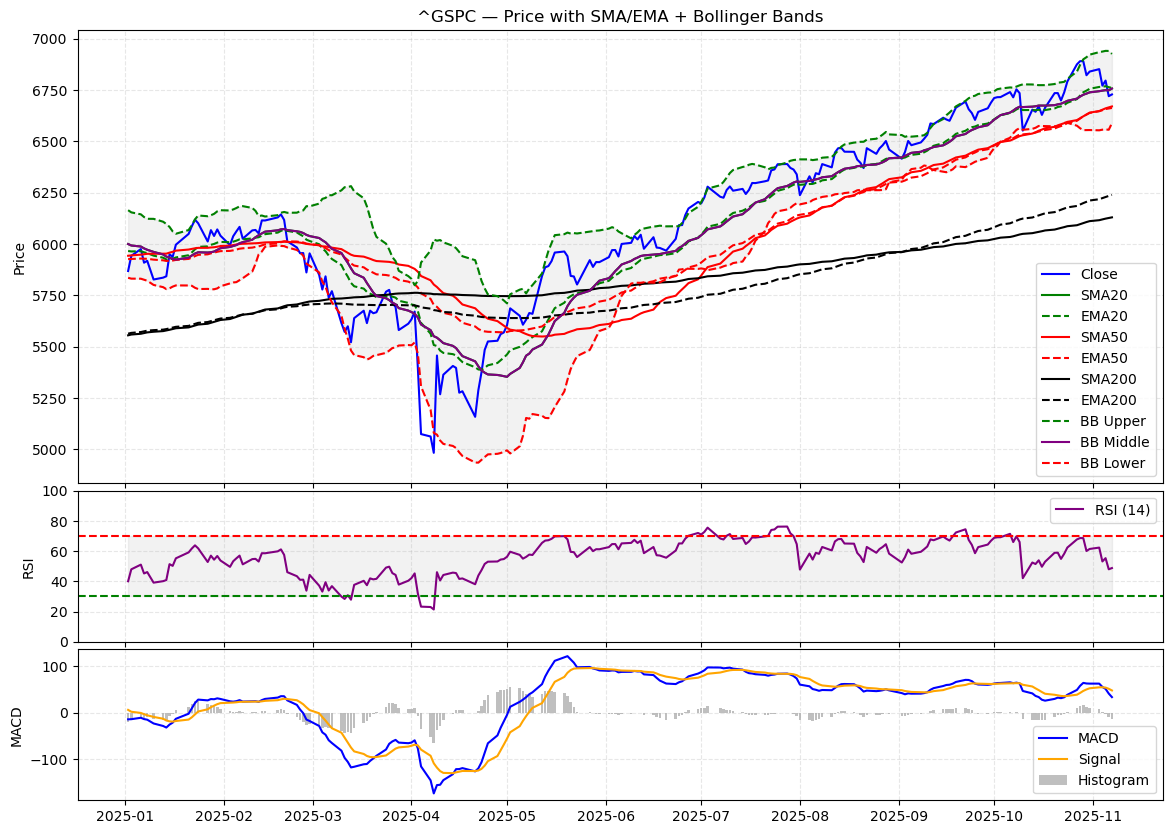

Plotted ^GSPC with indicators: SMA: [20, 50, 200], EMA: [20, 50, 200], Bollinger Bands: period=20, std=2, RSI: period=14, MACD: fast=12, slow=26, signal=9


In [7]:
plot_full_chart(df, ticker, [20, 50, 200], start_plot_date, sma=True, ema=True);

## RSI predictor plot

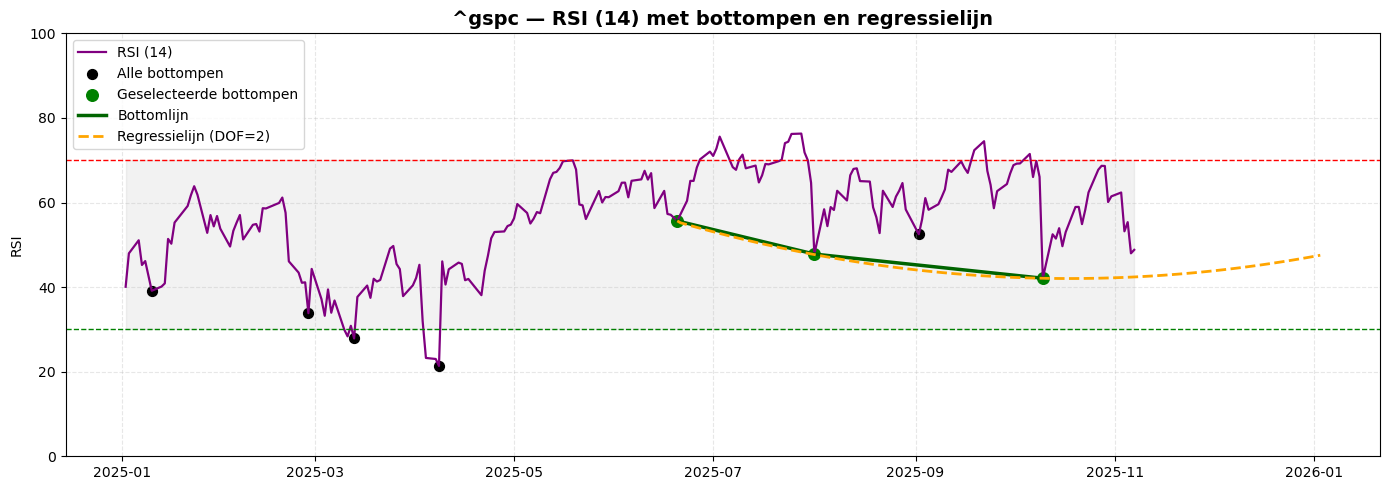

In [8]:
import src.RSI_predictor as rsi_mod

rsi_mod.plot_rsi_peaks(
    df,
    rsi_period,
    start_plot_date,
    ticker,
    mode='bottom',
    dof=2,
    future_days=85,
    selected_peak_indices=[4, 5,7],
    plot_level=False  # horizontale RSI-lijn uitzetten
)

## Monthly candle

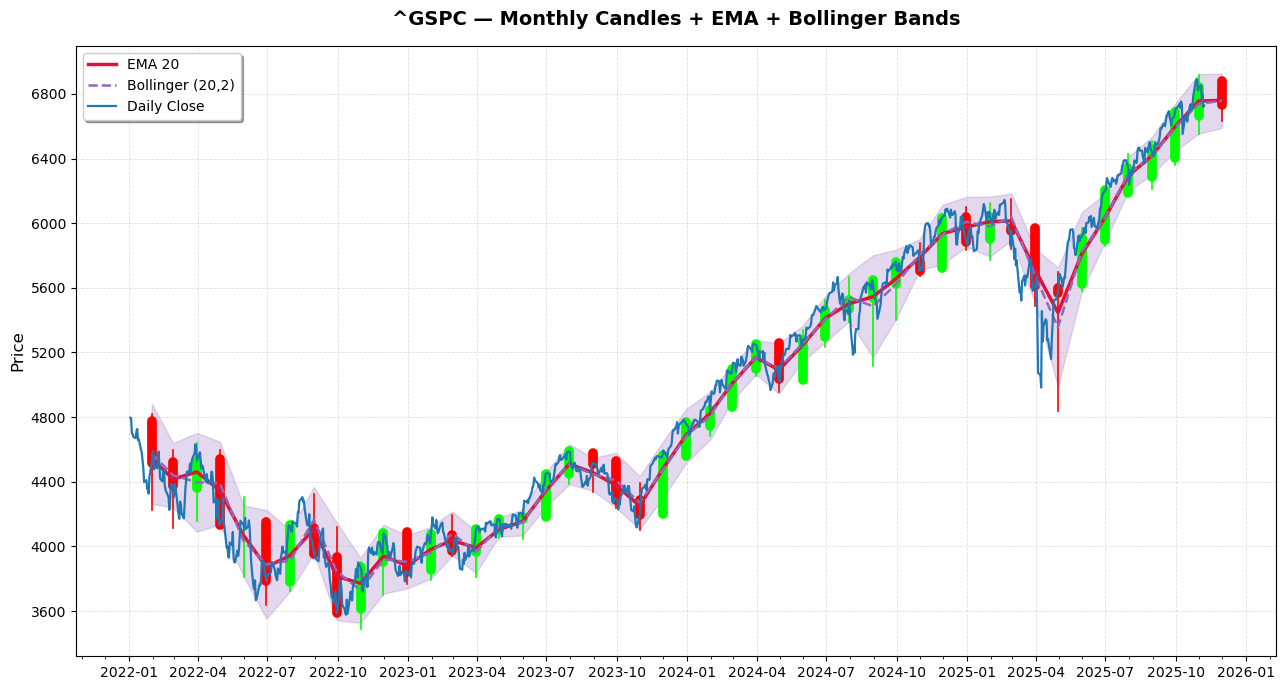

In [9]:
plot_monthly_candles(df, ticker, start_plot_date="2022-01-01")

## Rebound or trendswitch

In [10]:
from src.Bounce import scan_portfolio

List = ["nvda","hims","grrr","bzai","meta","bitf","iren","zeta","can","^gspc","vusa.as","fur.as","amg.as","gns"]

scan_result = scan_portfolio(
    tickers=List,
    start_date="2025-01-01"
)

Scanning 14 aandelen...


100%|██████████| 14/14 [00:05<00:00,  2.67it/s]


VOLLEDIGE SCANNER + DETAILS + MOMENTUM


,ticker,long_score,short_score,actie,momentum
0,ZETA,9,4,TE LAAT,RSI ↑ 54 | MACD ↑ -0.144 | Vol ↑ 132%
1,NVDA,7,2,KOOP VROEG,RSI ↓ 48 | MACD ↓ 3.383 | Vol ↑ 142%
2,HIMS,7,3,KOOP VROEG,RSI ↓ 35 | MACD ↓ -3.103 | Vol → 92%
3,BZAI,7,0,KOOP VROEG,RSI ↓ 38 | MACD ↓ -0.234 | Vol ↓ 53%
4,BITF,4,7,STERKE SHORT,RSI ↓ 45 | MACD ↓ 0.067 | Vol ↓ 61%
5,IREN,4,6,SHORT,RSI ↑ 53 | MACD ↓ 4.576 | Vol ↑ 127%
6,AMG.AS,4,10,STERKE SHORT,RSI ↓ 26 | MACD ↓ -0.713 | Vol ↑ 150%
7,GRRR,3,3,NEUTRAAL,RSI ↓ 34 | MACD ↓ -1.014 | Vol ↓ 78%
8,META,3,0,NEUTRAAL,RSI ↓ 26 | MACD ↓ -28.509 | Vol ↑ 141%
9,GNS,3,0,NEUTRAAL,RSI ↓ 36 | MACD ↓ -0.045 | Vol ↓ 73%



                                   KOOPKANSEN                                   


,ticker,actie,long_details,momentum
1,NVDA,KOOP VROEG,RSI Bull Div (+0.1) | DB → BO @ 172.40,RSI ↓ 48 | MACD ↓ 3.383 | Vol ↑ 142%
2,HIMS,KOOP VROEG,MACD Bull Div (+0.030) | DB (neck 44.00),RSI ↓ 35 | MACD ↓ -3.103 | Vol → 92%
3,BZAI,KOOP VROEG,MACD Bull Div (+0.005) | DB (neck 3.30),RSI ↓ 38 | MACD ↓ -0.234 | Vol ↓ 53%



                                 VERKOOPKANSEN                                  


,ticker,actie,short_details,momentum
4,BITF,STERKE SHORT,Oversold | H&S → BD @ 4.95,RSI ↓ 45 | MACD ↓ 0.067 | Vol ↓ 61%
5,IREN,SHORT,Oversold | DT → BD @ 63.30,RSI ↑ 53 | MACD ↓ 4.576 | Vol ↑ 127%
6,AMG.AS,STERKE SHORT,Bearish Engulfing + RSI 25.8 | H&S → BD @ 30.83,RSI ↓ 26 | MACD ↓ -0.713 | Vol ↑ 150%
11,CAN,STERKE SHORT,Oversold | RSI Bear Div (-8.9) | H&S → BD @ 1.57,RSI ↓ 46 | MACD ↓ -0.012 | Vol ↓ 40%
12,^GSPC,SHORT,Oversold | RSI Bear Div (-0.0),RSI ↓ 49 | MACD ↓ 33.391 | Vol → 104%


In [ ]:
from src.Bounce import scan_portfolio

tickers = ["AAPL", "NVDA", "ZETA", "AMZN", "TSLA"]
df_signals = scan_portfolio(tickers)
